In [2]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller as ADF

nanchang_weather = pd.read_csv('nanAQI.csv', sep=',', encoding='GB2312')
nanchang_weather['日期'] = pd.to_datetime(nanchang_weather['日期'],format="%Y/%m/%d")  #将字符串改为时间格式
nanchang_weather = nanchang_weather.set_index('日期') # 将date设置为index
nanchang_weather=nanchang_weather.dropna(axis=0,how='all')  #去除空行
nanchang_weather.head()


#nanchang_trainweather = pd.read_csv('nantraindata.csv', sep=',', encoding='GB2312')
#nanchang_trainweather['日期'] = pd.to_datetime(nanchang_trainweather['日期'],format="%Y/%m/%d")  #将字符串改为时间格式
#nanchang_trainweather = nanchang_trainweather.set_index('日期') # 将date设置为index
#nanchang_trainweather=nanchang_trainweather.dropna(axis=0,how='all')  #去除空行

#nanchang_testweather = pd.read_csv('testdata.csv', sep=',', encoding='GB2312')
#nanchang_testweather['日期'] = pd.to_datetime(nanchang_testweather['日期'],format="%Y/%m/%d")  #将字符串改为时间格式
#nanchang_testweather = nanchang_testweather.set_index('日期') # 将date设置为index
#nanchang_testweather=nanchang_testweather.dropna(axis=0,how='all')  #去除空行

,AQI指数
日期,
2013-10-28,162.0
2013-10-29,193.0
2013-10-30,210.0
2013-10-31,136.0
2013-11-01,119.0


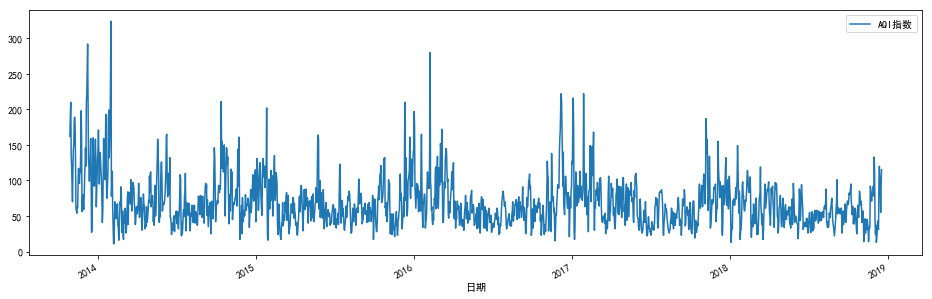

In [23]:
#时序图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
nanchang_weather.plot(figsize=(16,5))

C:\Users\WUYAO\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
C:\Users\WUYAO\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  """


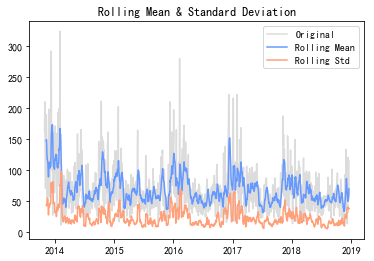

Results of Augment Dickey-Fuller Test:
Test Statistic                -8.083556e+00
p-value                        1.439819e-12
#Lags Used                     1.000000e+01
Number of Observations Used    1.860000e+03
Critical Value (1%)           -3.433871e+00
Critical Value (5%)           -2.863095e+00
Critical Value (10%)          -2.567598e+00
dtype: float64


In [22]:
#平稳性检测
def rolling_statistics(timeseries):
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
 
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='#DCDCDC',label='Original')
    mean = plt.plot(rolmean, color='#6699FF', label='Rolling Mean')
    std = plt.plot(rolstd, color='#FFA07A', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
##ADF检验
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    rolling_statistics(timeseries)#绘图
    print ('Results of Augment Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value   
    print (dfoutput)
    
adf_test(nanchang_weather[u'AQI指数']) 


In [24]:
##白噪声检验
from statsmodels.stats.diagnostic import acorr_ljungbox
def test_stochastic(ts,lag):
    p_value = acorr_ljungbox(ts, lags=lag) 
    return p_value

test_stochastic(nanchang_weather[u'AQI指数'],[6,12])

(array([2237.60534528, 2822.09012918]), array([0., 0.]))

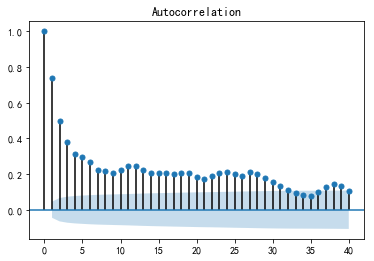

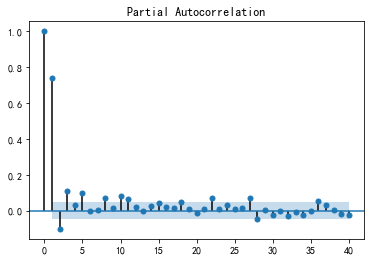

In [26]:
####自相关图ACF和偏相关图PACF
import statsmodels.api as sm
def acf_pacf_plot(ts_log_diff):
    sm.graphics.tsa.plot_acf(ts_log_diff,lags=40) #ARIMA,q
    sm.graphics.tsa.plot_pacf(ts_log_diff,lags=40) #ARIMA,p
    
acf_pacf_plot(nanchang_weather[u'AQI指数'])  


C:\Users\WUYAO\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\WUYAO\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


17063.37495858558 17113.183013522048 17081.72517405425


C:\Users\WUYAO\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


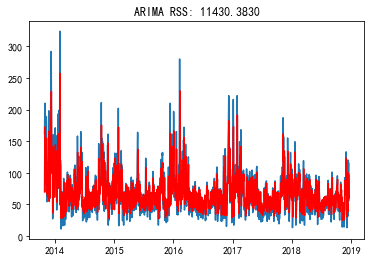

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randrange
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.api import tsa

arima = ARIMA(nanchang_weather, order=(6, 0, 1))
result = arima.fit(disp=False)
print(result.aic, result.bic, result.hqic)

plt.plot(nanchang_weather,)
plt.plot(result.fittedvalues, color='red')
plt.title('ARIMA RSS: %.4f' % sum(result.fittedvalues - nanchang_weather['AQI指数']) ** 2)
plt.show()

In [59]:
resid = result.resid
r, q, p = tsa.acf(resid.values.squeeze(), qstat=True)
print(len(r), len(q), len(p))
test_data = np.c_[range(1, 41), r[1:], q, p]
table = pd.DataFrame(test_data, columns=['lag', 'AC', 'Q', 'Prob(>Q)'])
print(table.set_index('lag'))


41 40 40
            AC          Q  Prob(>Q)
lag                                
1.0   0.000561   0.000590  0.980617
2.0  -0.001046   0.002641  0.998680
3.0  -0.013105   0.324820  0.955295
4.0  -0.005413   0.379823  0.984095
5.0  -0.019666   1.106160  0.953557
6.0  -0.008809   1.251958  0.974241
7.0  -0.059087   7.815605  0.349134
8.0   0.017874   8.416539  0.393874
9.0  -0.018887   9.087890  0.429201
10.0  0.004827   9.131770  0.519645
11.0  0.057567  15.375606  0.165939
12.0  0.059011  21.940123  0.038196
13.0  0.015327  22.383209  0.049701
14.0  0.004919  22.428873  0.070221
15.0  0.021745  23.321708  0.077544
16.0  0.037175  25.932415  0.054987
17.0 -0.003744  25.958906  0.075212
18.0  0.031352  27.817793  0.064883
19.0  0.039835  30.820449  0.042242
20.0  0.018396  31.461150  0.049389
21.0 -0.037479  34.122000  0.035164
22.0  0.032529  36.127509  0.029424
23.0  0.031593  38.020191  0.025345
24.0  0.039187  40.933848  0.016937
25.0  0.044061  44.619231  0.009238
26.0 -0.025928  45.

In [60]:
#pred = result.predict('2018-12-19 00:00:00', '2018-12-23 00:00:00')
#pred = result.predict(start='2018-12-19',end='2018-12-21',dynamic=True)
#predict(start="2013-11-1", end="2013-12-31", dynamic=True)
pred = result.forecast()
print(pred)
#x = pd.date_range('2018-12-01 00:00:00', '2018-12-20')

# lenth = len()
#plt.plot(pred)
plt.show()


(array([103.39857548]), array([23.01090284]), array([[ 58.29803466, 148.49911631]]))
end


In [61]:

forecast_n = 4 #预测未来4天走势
forecast_AR = result.forecast(forecast_n)
forecast_AR = forecast_AR[0]
print (forecast_AR)


[103.39857548  93.29978411  84.54156851  80.91898606]
